### This Python script collects real-time data on wind and solar energy production from the Singularity API.

We use the Singularity API for generation data instead of directly getting the data from the EIA because the EIA data is not cleaned and corrected. However, we need to get demand data from EIA because Singularity does not provide it.

API documentation: https://singularity-energy.readthedocs.io/en/latest/full_api.html

In [122]:
import http.client
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import requests
from datetime import datetime, timedelta

### Retrieve Data

#### Get generation data from Singularity API

In [123]:
# Define start and end dates
start_date = "2024-03-22T00:00:00Z"
end_date = "2024-03-22T23:00:00Z"

# Define region
region = "ISONE"

# Construct the URL with variables
url = f"/v2/generated/fuel-mix?region={region}&source=EIA&start={start_date}&end={end_date}&resolution=1h"

# Define headers
headers = {
    'x-api-key': "",
    'Accept': "application/json",
    'X-API-Key': "0a593daaca0c441485aef1183e9181ce"
}

# Establish connection
conn = http.client.HTTPSConnection("api.singularity.energy")

# Make GET request
conn.request("GET", url, headers=headers)

# Get response
res = conn.getresponse()

# Read response data
data = res.read()

# Decode and parse JSON data
parsed_data = json.loads(data.decode('utf-8'))

#### Organize data into DF

In [141]:
# Extracting data for each energy generation type and other information
energy_data = []
start_dates = []
updated = []

for entry in parsed_data['data']:
    data = entry['data']
    energy_data.append(data)
    start_dates.append(pd.to_datetime(entry['start_date']))
    updated.append(pd.to_datetime(entry['meta'].get('updated_at', None)))  # Convert to datetime
    
# Creating DataFrame
generation_data = pd.DataFrame(energy_data)
generation_data['start_date'] = start_dates
generation_data['updated_at'] = updated

# Extracting the hour component of the 'start_date' column
generation_data['hour'] = generation_data['start_date'].dt.hour

generation_data

,coal_mw,hydro_mw,natural_gas_mw,nuclear_mw,other_mw,petroleum_mw,solar_mw,wind_mw,start_date,updated_at,hour
0,4.0,2342.0,6838.0,3339.0,558.0,0.0,12.0,1200.0,2024-03-22 00:00:00+00:00,2024-03-24 15:03:09.274091+00:00,0
1,2.0,1228.0,6894.0,3344.0,550.0,0.0,0.0,1179.0,2024-03-22 01:00:00+00:00,2024-03-24 15:03:25.968398+00:00,1
2,2.0,1128.0,6408.0,3349.0,544.0,0.0,0.0,1153.0,2024-03-22 02:00:00+00:00,2024-03-24 15:03:59.157944+00:00,2
3,3.0,1139.0,5515.0,3346.0,547.0,0.0,0.0,1143.0,2024-03-22 03:00:00+00:00,2024-03-24 15:03:54.085166+00:00,3
4,5.0,1041.0,4805.0,3326.0,528.0,0.0,0.0,1161.0,2024-03-22 04:00:00+00:00,2024-03-24 15:04:13.764457+00:00,4
5,3.0,1044.0,4322.0,3346.0,529.0,0.0,0.0,1160.0,2024-03-22 05:00:00+00:00,2024-03-24 15:04:34.438988+00:00,5
6,3.0,1043.0,4291.0,3351.0,527.0,0.0,0.0,1159.0,2024-03-22 06:00:00+00:00,2024-03-24 15:04:46.940427+00:00,6
7,2.0,1031.0,4418.0,3349.0,532.0,0.0,0.0,1148.0,2024-03-22 07:00:00+00:00,2024-03-24 15:04:46.994004+00:00,7
8,4.0,998.0,4525.0,3359.0,537.0,0.0,0.0,1129.0,2024-03-22 08:00:00+00:00,2024-03-24 15:05:22.772641+00:00,8
9,3.0,1146.0,5090.0,3379.0,539.0,0.0,0.0,1114.0,2024-03-22 09:00:00+00:00,2024-03-24 15:05:20.155711+00:00,9


#### Get demand data from EIA

In [137]:
# api key for EIA
api_key = '1gfSbFTeX48Nemb9OPqUqFjJZ637WAs1PcVD9Qnt'

# Get Market Summary table (demand, day ahead demand, net generation, interchange)
# ISONE
url = "https://api.eia.gov/v2/electricity/rto/region-data/data/?frequency=hourly&data[0]=value&facets[respondent][]=ISNE&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=1gfSbFTeX48Nemb9OPqUqFjJZ637WAs1PcVD9Qnt"
data = requests.get(url).json()
market_table = pd.DataFrame(data['response']['data'])

# Clean up dataframe
new_column_names = {'period': 'Time', 'respondent-name': 'Balancing Authority', 'type-name': 'Data Type',
                   'value': 'Value', 'value-units': 'Units'}
market_table = market_table.rename(columns=new_column_names)
market_table = market_table.drop(columns=['type','respondent','Balancing Authority'])

# Add an "Hour" column for hour of the day
market_table['Time'] = pd.to_datetime(market_table['Time'])
market_table.insert(market_table.columns.get_loc('Time') + 1, 'Hour', market_table['Time'].dt.hour)

# Convert strings to numbers
market_table['Value'] = pd.to_numeric(market_table['Value'])

In [138]:
# Create datetime versions of start and end date
# Remove the 'Z' character from the strings
start_date_cleaned = start_date.replace('Z', '')
end_date_cleaned = end_date.replace('Z', '')
# Convert to np.datetime64
start_date_dt = np.datetime64(start_date_cleaned)
end_date_dt = np.datetime64(end_date_cleaned)

# Create a boolean mask for filtering to selected day
mask = (market_table['Time'] >= start_date_dt) & (market_table['Time'] <= end_date_dt)

# Apply the mask to filter the table
filtered_market_table = market_table[mask]

# Isolate demand
demand_data = filtered_market_table[filtered_market_table['Data Type'] == 'Demand'].sort_values(by='Hour').set_index('Hour')
demand_data

,Time,Data Type,Value,Units
Hour,,,,
0,2024-03-22 00:00:00,Demand,15474.0,megawatthours
1,2024-03-22 01:00:00,Demand,15315.0,megawatthours
2,2024-03-22 02:00:00,Demand,14748.0,megawatthours
3,2024-03-22 03:00:00,Demand,13762.0,megawatthours
4,2024-03-22 04:00:00,Demand,12882.0,megawatthours
5,2024-03-22 05:00:00,Demand,12301.0,megawatthours
6,2024-03-22 06:00:00,Demand,11987.0,megawatthours
7,2024-03-22 07:00:00,Demand,11832.0,megawatthours
8,2024-03-22 08:00:00,Demand,11880.0,megawatthours


### Plotting

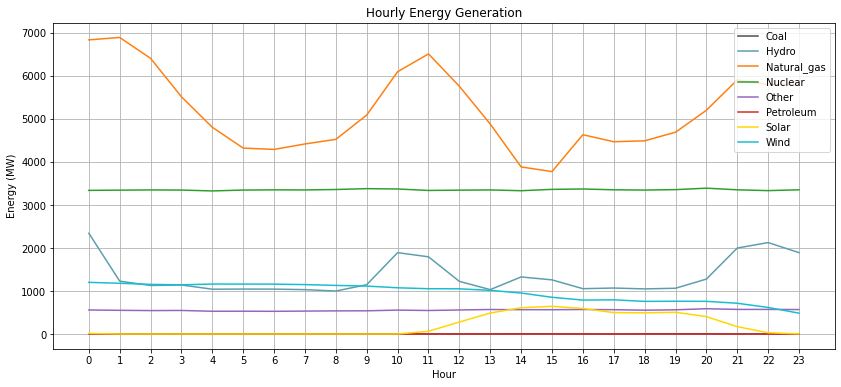

In [142]:
colors = {
    'coal_mw': '#4c4c4c',      # dark gray
    'hydro_mw': '#5c9eae',     # light blue
    'natural_gas_mw': '#ff7f0e',  # orange
    'nuclear_mw': '#2ca02c',   # green
    'other_mw': '#9467bd',     # purple
    'petroleum_mw': '#d62728', # red
    'solar_mw': '#ffd700',     # gold
    'wind_mw': '#17becf'       # cyan
}

# Plotting the columns with custom colors
plt.figure(figsize=(14, 6))  # Set the figure size

for column, color in colors.items():
    plt.plot(generation_data.index, generation_data[column], label=column.replace('_mw', '').capitalize(), color=color)

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


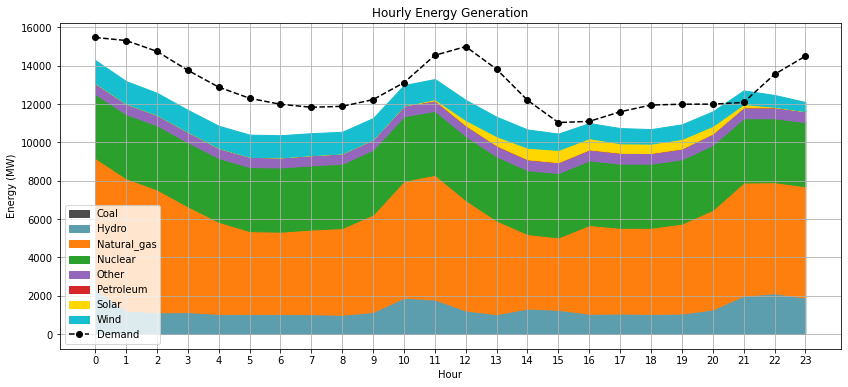

In [157]:
plt.figure(figsize=(14, 6))  # Set the figure size

# Initialize bottom array for stacking
bottom = np.zeros(len(generation_data))

# Plotting the columns with custom colors
for column, color in colors.items():
    plt.fill_between(generation_data.index, bottom, bottom + generation_data[column], label=column.replace('_mw', '').capitalize(), color=color)
    bottom += generation_data[column]

# Plot Demand
plt.plot(demand_data.index, demand_data['Value'], linestyle='--', marker='o', color='black', label='Demand')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


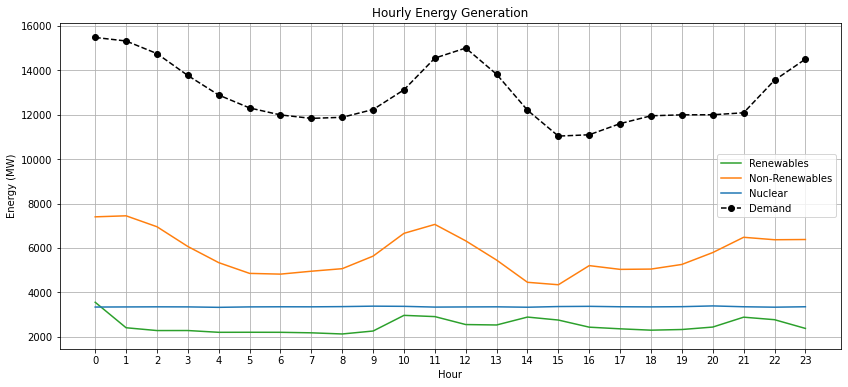

In [144]:
# Plotting the columns with custom colors
plt.figure(figsize=(14, 6))  # Set the figure size

# Summing renewables and plotting as one line
renewables = ['hydro_mw', 'solar_mw', 'wind_mw']
generation_data['Renewables'] = generation_data[renewables].sum(axis=1)
plt.plot(generation_data.index, generation_data['Renewables'], label='Renewables', color='#2ca02c')

# Summing non-renewables except nuclear and plotting as one line
non_renewables = ['coal_mw', 'natural_gas_mw', 'petroleum_mw', 'other_mw']
generation_data['Non-renewables'] = generation_data[non_renewables].sum(axis=1)
plt.plot(generation_data.index, generation_data['Non-renewables'], label='Non-Renewables', color='#ff7f0e')

# Plotting nuclear separately
plt.plot(generation_data.index, generation_data['nuclear_mw'], label='Nuclear', color='#1f77b4', linestyle='-')

# Plot Demand
plt.plot(demand_data.index, demand_data['Value'], linestyle='--', marker='o', color='black', label='Demand')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


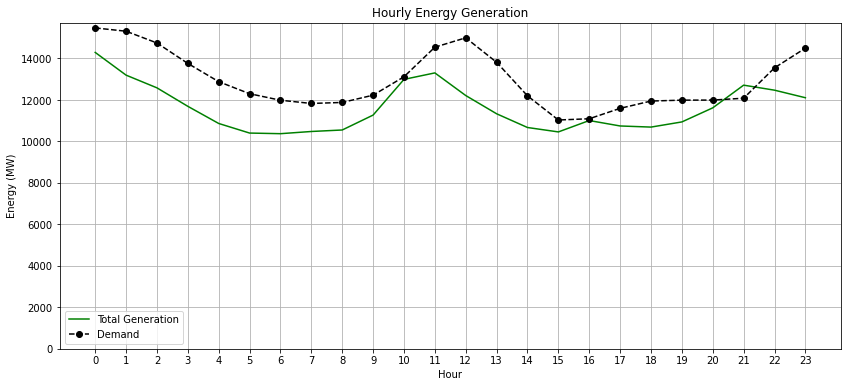

In [145]:
plt.figure(figsize=(14, 6))  # Set the figure size

# Summing up total generation
total_generation = generation_data[list(colors.keys())].sum(axis=1)
plt.plot(generation_data.index, total_generation, label='Total Generation', color='green')

# Plot Demand
plt.plot(demand_data.index, demand_data['Value'], linestyle='--', marker='o', color='black', label='Demand')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

# Set y-axis limit to start from 0
plt.ylim(0)

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


### Datacenter example

In [163]:
datacenter_load = 2000 # MW

In [164]:
total_demand_vec = demand_data.Value
total_demand_without_datacenter_vec = total_demand_vec - datacenter_load
datacenter_percent_demand = datacenter_load / total_demand_vec
datacenter_percent_demand

Hour
0     0.129249
1     0.130591
2     0.135612
3     0.145328
4     0.155255
5     0.162588
6     0.166847
7     0.169033
8     0.168350
9     0.163519
10    0.152462
11    0.137504
12    0.133351
13    0.144749
14    0.163948
15    0.181258
16    0.180278
17    0.172473
18    0.167392
19    0.166792
20    0.166736
21    0.165508
22    0.147612
23    0.137941
Name: Value, dtype: float64

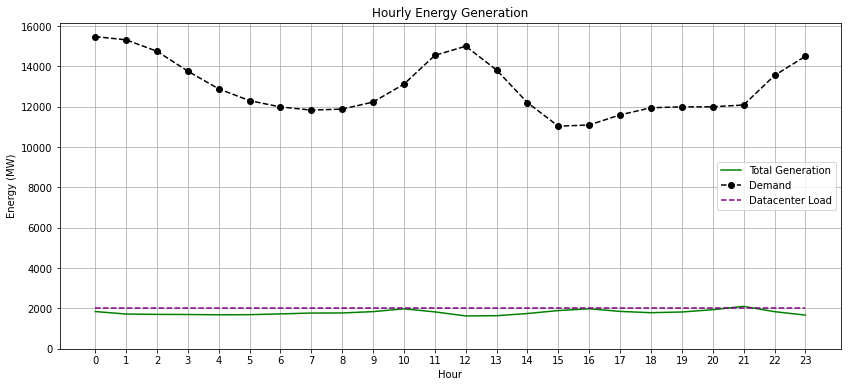

In [165]:
plt.figure(figsize=(14, 6))  # Set the figure size

# Summing up total generation
plt.plot(generation_data.index, total_generation, label='Total Generation', color='green')

# Plot Demand
plt.plot(demand_data.index, demand_data['Value'], linestyle='--', marker='o', color='black', label='Demand')

# Plot Datacenter Load
plt.plot(generation_data_datacenter.index, [datacenter_load] * len(generation_data_datacenter), linestyle='--', color='purple', label='Datacenter Load')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

# Set y-axis limit to start from 0
plt.ylim(0)

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


#### Scale the generation data to the resouce mix powering the datacenter

In [166]:
generation_data_datacenter = generation_data.copy()

In [167]:
# Selecting the columns to be multiplied
columns_to_multiply = ['coal_mw', 'hydro_mw', 'natural_gas_mw', 'nuclear_mw', 'other_mw', 'petroleum_mw', 'solar_mw', 'wind_mw', 'Renewables', 'Non-renewables']

# Convert DataFrame and vector to numpy arrays
generation_data_array = generation_data_datacenter[columns_to_multiply].to_numpy()
datacenter_percent_demand_array = np.array(datacenter_percent_demand)

# Perform element-wise multiplication
result_array = generation_data_array * datacenter_percent_demand_array[:, np.newaxis]

# Update the original DataFrame with the result
generation_data_datacenter[columns_to_multiply] = result_array


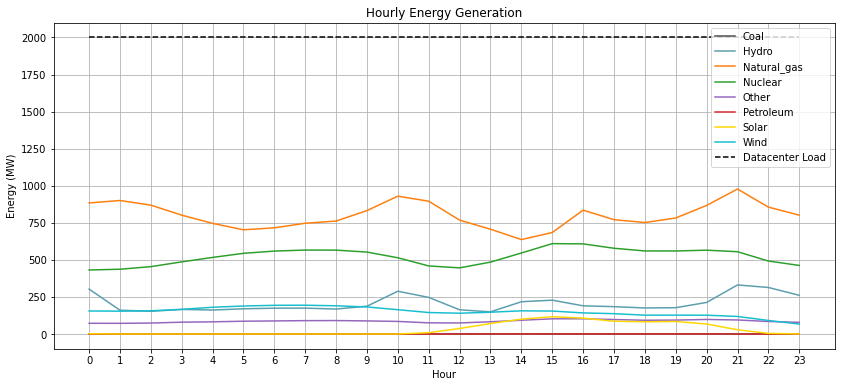

In [168]:
colors = {
    'coal_mw': '#4c4c4c',      # dark gray
    'hydro_mw': '#5c9eae',     # light blue
    'natural_gas_mw': '#ff7f0e',  # orange
    'nuclear_mw': '#2ca02c',   # green
    'other_mw': '#9467bd',     # purple
    'petroleum_mw': '#d62728', # red
    'solar_mw': '#ffd700',     # gold
    'wind_mw': '#17becf'       # cyan
}

# Plotting the columns with custom colors
plt.figure(figsize=(14, 6))  # Set the figure size

for column, color in colors.items():
    plt.plot(generation_data_datacenter.index, generation_data_datacenter[column], label=column.replace('_mw', '').capitalize(), color=color)

# Plot Datacenter Load
plt.plot(generation_data_datacenter.index, [datacenter_load] * len(generation_data_datacenter), linestyle='--', color='black', label='Datacenter Load')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


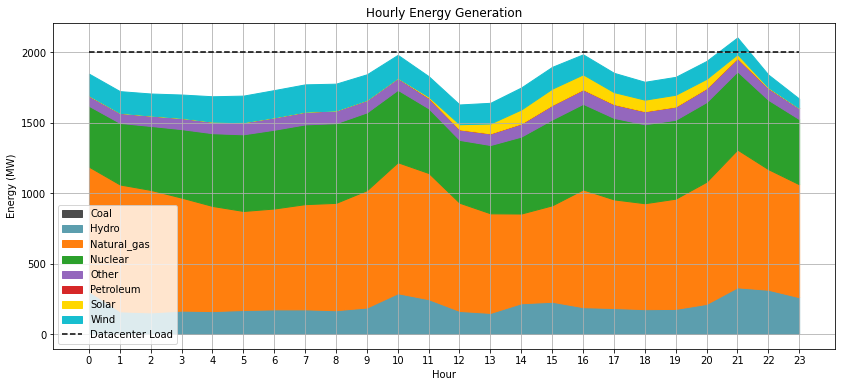

In [169]:
plt.figure(figsize=(14, 6))  # Set the figure size

# Initialize bottom array for stacking
bottom = np.zeros(len(generation_data_datacenter))

# Plotting the columns with custom colors
for column, color in colors.items():
    plt.fill_between(generation_data_datacenter.index, bottom, bottom + generation_data_datacenter[column], label=column.replace('_mw', '').capitalize(), color=color)
    bottom += generation_data_datacenter[column]

# Plot Datacenter Load
plt.plot(generation_data_datacenter.index, [datacenter_load] * len(generation_data_datacenter), linestyle='--', color='black', label='Datacenter Load')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


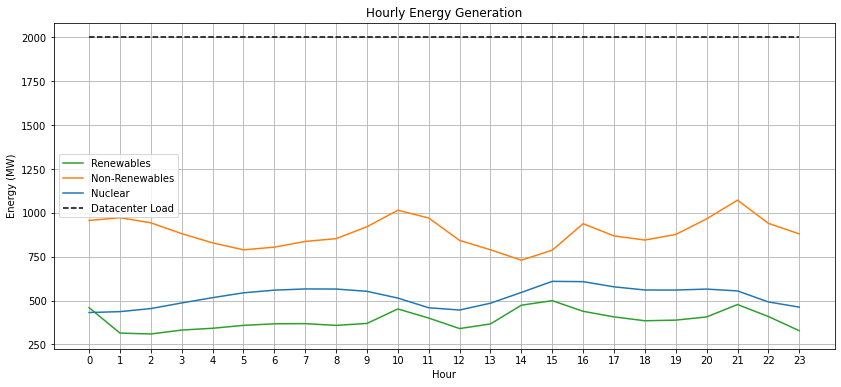

In [171]:
# Plotting the columns with custom colors
plt.figure(figsize=(14, 6))  # Set the figure size

# Summing renewables and plotting as one line
plt.plot(generation_data_datacenter.index, generation_data_datacenter['Renewables'], label='Renewables', color='#2ca02c')

# Summing non-renewables except nuclear and plotting as one line
plt.plot(generation_data_datacenter.index, generation_data_datacenter['Non-renewables'], label='Non-Renewables', color='#ff7f0e')

# Plotting nuclear separately
plt.plot(generation_data_datacenter.index, generation_data_datacenter['nuclear_mw'], label='Nuclear', color='#1f77b4', linestyle='-')

# Plot Datacenter Load
plt.plot(generation_data_datacenter.index, [datacenter_load] * len(generation_data_datacenter), linestyle='--', color='black', label='Datacenter Load')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()


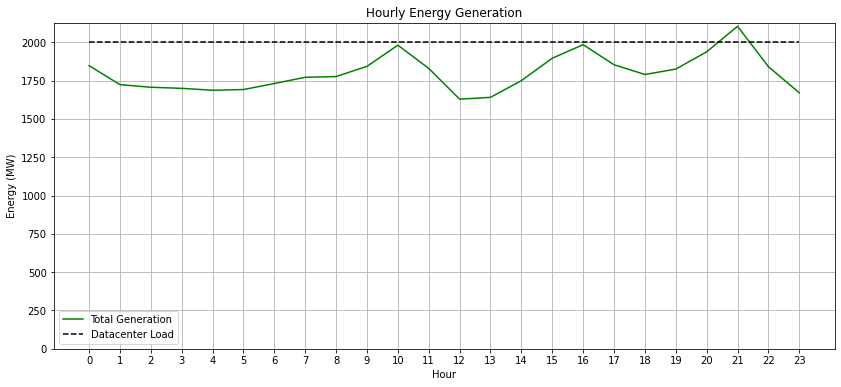

In [172]:
plt.figure(figsize=(14, 6))  # Set the figure size

# Summing up total generation
total_generation = generation_data_datacenter[list(colors.keys())].sum(axis=1)
plt.plot(generation_data_datacenter.index, total_generation, label='Total Generation', color='green')

# Plot Datacenter Load
plt.plot(generation_data_datacenter.index, [datacenter_load] * len(generation_data_datacenter), linestyle='--', color='black', label='Datacenter Load')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Energy (MW)')
plt.title('Hourly Energy Generation')

# Set y-axis limit to start from 0
plt.ylim(0)

plt.xticks(range(24))
plt.grid(True)

# Adding legend
plt.legend()

# Show plot
plt.show()

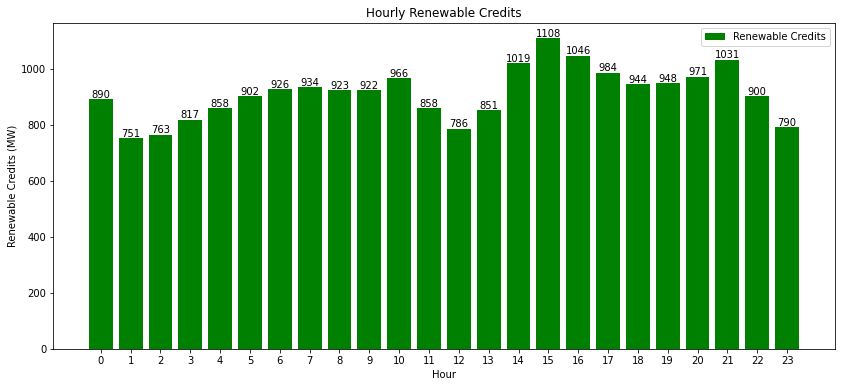

In [154]:
# Calculate renewable credits for each hour
renewable_credits = generation_data_datacenter['Renewables'] + generation_data_datacenter['nuclear_mw']

# Plotting the bar chart
plt.figure(figsize=(14, 6))  # Set the figure size
bars = plt.bar(generation_data_datacenter.index, renewable_credits, color='green', label='Renewable Credits')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Renewable Credits (MW)')
plt.title('Hourly Renewable Credits')

plt.xticks(range(24))

# Adding legend
plt.legend()

# Annotating the top of each bar with the number of MW
for bar, credit in zip(bars, renewable_credits):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(credit)), ha='center', va='bottom')

# Show plot
plt.show()


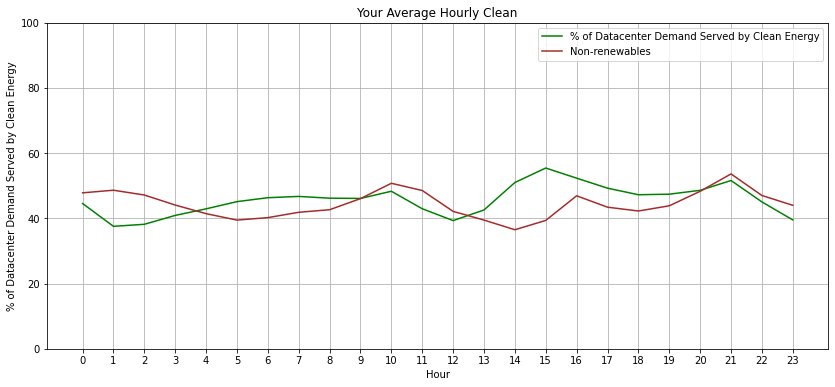

In [173]:
# Calculate the total clean energy (renewables + nuclear) for each hour
clean_energy_total = generation_data_datacenter['Renewables'] + generation_data_datacenter['nuclear_mw']

# Calculate the percentage of datacenter demand served by clean energy for each hour
clean_energy_percentage = clean_energy_total / datacenter_load * 100
dirty_energy_percentage = generation_data_datacenter['Non-renewables'] / datacenter_load * 100

# Create a line plot for Your Average Hourly Clean
plt.figure(figsize=(14, 6))  # Set the figure size

# Plotting the percentage of datacenter demand served by clean energy
plt.plot(generation_data_datacenter.index, clean_energy_percentage, label='% of Datacenter Demand Served by Clean Energy', color='green')

# Plotting another form of energy (e.g., non-renewables) for comparison
# Replace 'another_energy' with the appropriate column name from your DataFrame
plt.plot(generation_data_datacenter.index, dirty_energy_percentage, label='Non-renewables', color='brown')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('% of Datacenter Demand Served by Clean Energy')
plt.title('Your Average Hourly Clean')

plt.xticks(range(24))
plt.grid(True)
plt.ylim(0, 100)

# Adding legend
plt.legend()

# Show plot
plt.show()
